# Laboratorio 3 - Parte 2

### Arboles de decisión y Random Forest

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.


#### Primer integrante: John David Gonzalez 1017204873
#### Segundo integrante: Mateo Llano 1045025062

In [1]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats
#from __future__ import division

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasifiación de dígitos escritos a mano, el cual fue abordado en el laboratorio anterior. Usaremos únicamente 4 de las 10 clases disponibles. Los datos fueron preprocesados para reducir el número de características. La técnica usada será analizada más adelante en el curso.

In [2]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits(n_class=4)

#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)

#---------- Datos a usar ----------------------
X = data
Y = digits.target
    

/home/jdavid/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jdavid/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jdavid/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jdavid/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jdavid/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indi

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un arbol de decisión. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<b>Note</b> que existe una clase para modelos de clasificación y otra para modelos de regresión:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [4]:
import math
import numpy as np
from numpy import random, matlib
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeClassifier

def decisionTree(depth=1):
    #Validamos el modelo
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        model = DecisionTreeClassifier(max_depth=depth).fit(Xtrain, Ytrain)



        #Validación
        Ytrain_pred = model.predict(Xtrain)#Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        Yest = model.predict(Xtest)#Use el modelo previamente entrenado para hacer predicciones con las muestras de test

        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1

    print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))


Responda:

1.1 ¿Cuáles criterios para detener el crecimiento del árbol o de los nodos están disponibles en la librería?:
Para detener el crecimiento del árbol se utilizan cuatro técnicas: <br> La primera es haciendo uso de la profundidad que deberia tener el árbol. <br> La segunda es que un nodo no tenga las muestras suficientes para hacer una partición. <br> La tercera es que una hoja no quede con el numero de muestras necesarias. <br> La cuarta es cuando se alcanza el grado minimo de impureza estipulado. 




1.2. ¿Cuáles son los parámetros asociados con los criterios enumerados en el punto anterior?:
Para la primera utilizamos max_depth <br> En la segunda utilizamos min_samples_split <br> En la tercera utilizamos min_samples_leaf <br> En la cuarta utilizamos min_impurity_decrease

In [14]:
decisionTree(5)

Eficiencia durante el entrenamiento = 0.9828770703537302+-0.004584704067609588
Eficiencia durante la validación = 0.9111884805947097+-0.044609582556530296


In [17]:
decisionTree(10)

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476


In [18]:
decisionTree(20)

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476


In [19]:
decisionTree(30)

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476


In [20]:
decisionTree(50)

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476


## Ejercicio 2

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [21]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Maxima profundidad' : pd.Series([5,10,20,30,50])})
df_types["Eficiencia en validacion"] = ""
df_types["Intervalo de confianza"] = ""
df_types.set_index(['Maxima profundidad'], inplace=True)
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [23]:
qgrid_widget.get_changed_df()

,Eficiencia en validacion,Intervalo de confianza
Maxima profundidad,,
5,0.9111,0.0446
10,0.9013,0.0323
20,0.9013,0.0323
30,0.9013,0.0323
50,0.9013,0.0323


Responda: 
    
2.1 ¿Tiene algún efecto la normalización o estándarización de las variables en el desempeño del modelo de árboles de decisión? Explique su respuesta.    

El efecto que tiene la normalización de las variables es pequeño, es decir, los resultados que se tienen en la validación del modelo entre normalizar las variables y no hacerlo el margen de error es aproximadamente 0.7%, esto se debe a que no se busca el mejor comportamiento del modelo si no que se busca la mejor partición que permita tomar la mejor decisión para obtener el resultado a predecir.



### Algoritmo sin normalización

In [15]:
decisionTree(10)

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9041819614588368+-0.03325916115155368


### Algoritmo con normalización

In [25]:
decisionTree(10)

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9013808190321215+-0.032391925101484476


## Ejercicio 3

En la siguiente celda se define una simulación para entrenar y validar un modelo usando los datos previamente cargados. Complete el código para usar como modelo de predicción un Random Forest. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

<b>Note</b> que al igual que en el caso anterior, existe una clase para modelos de clasificación y otra para modelos de regresión: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [9]:
from sklearn.ensemble import RandomForestClassifier
import time

def randomTree(narboles = 1, caracteristicas=1):
    #Validamos el modelo
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = np.zeros(Folds)
    EficienciaVal = np.zeros(Folds)
    skf = StratifiedKFold(n_splits=Folds)
    j = 0
    timesTrain = []
    timesVal = []
    for train, test in skf.split(X, Y):
        Xtrain = X[train,:]
        Ytrain = Y[train]
        Xtest = X[test,:]
        Ytest = Y[test]

        #Normalizamos los datos
        media = np.mean(Xtrain)
        desvia = np.std(Xtrain)
        Xtrain = sc.stats.stats.zscore(Xtrain)
        Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        ti = time.clock()
        model = RandomForestClassifier(n_estimators=narboles, max_features= caracteristicas).fit(Xtrain, Ytrain)
        tf = time.clock()
        timesTrain.append(tf-ti)

        #Validación
        Ytrain_pred = model.predict(Xtrain )#Use el modelo previamente entrenado para hacer predicciones con las mismas muestras de entrenamiento
        ti = time.clock()
        Yest = model.predict(Xtest) #Use el modelo previamente entrenado para hacer predicciones con las muestras de test
        tf = time.clock()
        timesVal.append((tf-ti)/np.shape(Xtest)[0])
        #Evaluamos las predicciones del modelo con los datos de test
        EficienciaTrain[j] = np.mean(Ytrain_pred.ravel() == Ytrain.ravel())
        EficienciaVal[j] = np.mean(Yest.ravel() == Ytest.ravel())
        j += 1

    #print('Eficiencia durante el entrenamiento = ' + str(np.mean(EficienciaTrain)) + '+-' + str(np.std(EficienciaTrain)))
    #print('Eficiencia durante la validación = ' + str(np.mean(EficienciaVal)) + '+-' + str(np.std(EficienciaVal)))
    return ((np.mean(EficienciaVal)), (np.std(EficienciaVal)), np.mean(timesTrain), np.mean(timesVal))

Una vez completado el código realice los experimentos necesarios para llenar la siguiente tabla:

In [89]:
arboles =[5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]
nodos = [5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30]
for i in range(np.size(arboles)):
    eficacia, intervalo = randomTree(narboles = arboles[i], caracteristicas=nodos[i])
    print(str(i)+". Numero de arboles: " + str(arboles[i]) + " con "+ str(nodos[i]) + " variables, la eficacia es: "+ str(eficacia)+ " intervalo de " + str(intervalo))
    print()

0. Numero de arboles: 5 con 5 variables, la eficacia es: 0.8777529077694397 intervalo de 0.014338139113272093

1. Numero de arboles: 5 con 10 variables, la eficacia es: 0.9249171609514608 intervalo de 0.03644770442982503

2. Numero de arboles: 5 con 15 variables, la eficacia es: 0.937502185836855 intervalo de 0.01540481302780255

3. Numero de arboles: 5 con 20 variables, la eficacia es: 0.9362140803004042 intervalo de 0.027417037303269644

4. Numero de arboles: 5 con 25 variables, la eficacia es: 0.9027698808390645 intervalo de 0.02776807945552732

5. Numero de arboles: 5 con 30 variables, la eficacia es: 0.9237127927122086 intervalo de 0.03279669769652372

6. Numero de arboles: 10 con 5 variables, la eficacia es: 0.9153172089111556 intervalo de 0.03362828792996027

7. Numero de arboles: 10 con 10 variables, la eficacia es: 0.9265222988171765 intervalo de 0.024224533125019335

8. Numero de arboles: 10 con 15 variables, la eficacia es: 0.923604498870598 intervalo de 0.034535442829414745

In [86]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de arboles' : pd.Series([5,5,5,5,5,5,10,10,10,10,10,10,20,20,20,20,20,20,50,50,50,50,50,50,100,100,100,100,100,100]),
    'Variables analizadas por nodo' : pd.Series([5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30,5,10,15,20,25,30])})
df_types["Eficiencia en validacion"] = np.zeros(30)
df_types["Intervalo de confianza"] = np.zeros(30)
df_types.set_index(['Numero de arboles','Variables analizadas por nodo'], inplace=True)
#df_types.sort_index(inplace=True)
df_types["Eficiencia en validacion"][0]=0.8778
df_types["Intervalo de confianza"][0] = 0.0143

qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [91]:
qgrid_widget.get_changed_df()

Eficiencia en validacion  \
Numero de arboles Variables analizadas por nodo                             
5                 5                                                0.8778   
                  10                                               0.9249   
                  15                                               0.9375   
                  20                                               0.9362   
                  25                                               0.9027   
                  30                                               0.9237   
10                5                                                0.9153   
                  10                                               0.9265   
                  15                                               0.9236   
                  20                                               0.9250   
                  25                                               0.9223   
                  30                                               0.9223   
20                5                                                0.9458   
                  10                                               0.9348   
                  15                                               0.9388   
                  20                                               0.9333   
                  25                                               0.9264   
                  30                                               0.9306   
50                5                                                0.9554   
                  10                                               0.9527   
                  15                                               0.9471   
                  20                                               0.9347   
                  25                                               0.9375   
                  30                                               0.9250   
100               5                                                0.9693   
                  10                                               0.9582   
                  15                                               0.9416   
                  20                                               0.9346   
                  25                                               0.9347   
                  30                                               0.9292   

                                                 Intervalo de confianza  
Numero de arboles Variables analizadas por nodo                          
5                 5                                              0.0143  
                  10                                             0.0364  
                  15                                             0.0154  
                  20                                             0.0274  
                  25                                             0.0277  
                  30                                             0.0327  
10                5                                              0.0336  
                  10                                             0.0242  
                  15                                             0.0345  
                  20                                             0.0250  
                  25                                             0.0267  
                  30                                             0.0304  
20                5                                              0.0152  
                  10                                             0.0248  
                  15                                             0.0228  
                  20                                             0.0227  
                  25                                             0.0252  
                  30                                             0.0278  
50                5                                              0.0207  
                  10          

Responda:
    
3.1 Realice una prueba adicional empleando el total de variables para la selección del mejor umbral en cada nodo ¿De acuerdo con los resultados es mejor usar un bagging de árboles o Random Forest? Explique su respuesta.    

De acuerdo con los resultados obtenidos, se evidencia que el bagging es mejor con pocos árboles, en este caso hasta 5 árboles, a partir de allí el random forest presenta una mejora en la eficiencia y se convierte en un método mucho mejor. Esto sucede porque en el caso del random forest al hacer uso de la aleatoriedad, es probable que se haga una selección de las mejores variables.

### Resultados del bagging

In [50]:
randomTree(narboles = 5, caracteristicas=None)

Eficiencia durante el entrenamiento = 0.9967592338387035+-0.0015334377385946292
Eficiencia durante la validación = 0.9138664168038948+-0.024561465718761794


('0.9138664168038948', '0.024561465718761794')

In [51]:
randomTree(narboles = 10, caracteristicas=None)

Eficiencia durante el entrenamiento = 0.9986111015673852+-0.0015334194593955293
Eficiencia durante la validación = 0.91953828115321+-0.02983613998326646


('0.91953828115321', '0.02983613998326646')

In [52]:
randomTree(narboles = 20, caracteristicas=None)

Eficiencia durante el entrenamiento = 0.9990740708987342+-0.0009259322766002021
Eficiencia durante la validación = 0.926451944739026+-0.029989748111451112


('0.926451944739026', '0.029989748111451112')

In [53]:
randomTree(narboles = 50, caracteristicas=None)

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9208886286144272+-0.02888445276935772


('0.9208886286144272', '0.02888445276935772')

In [54]:
randomTree(narboles = 100, caracteristicas=None)

Eficiencia durante el entrenamiento = 1.0+-0.0
Eficiencia durante la validación = 0.9236973572788921+-0.03705444424572746


('0.9236973572788921', '0.03705444424572746')

## Ejercicio 4

Utilice el paquete time (instrucción time.clock()) para medir el efecto del número de árboles y de la cantidad de variables a analizar por nodo, en el tiempo que tarda el entrenamiento del modelo Random Forest. Construya una gráfica de tiempo vs número de árboles, dejando constante el número de variables en 20, y una gráfica de tiempo vs número de variables dejando constante el número de árboles en 30.

/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: Dep

/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: Dep

/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: Dep

/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: Dep

/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: Dep

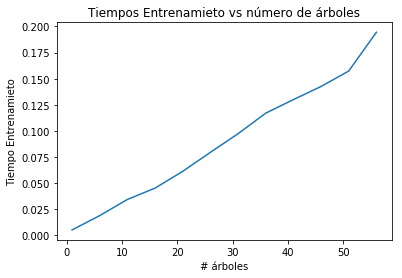

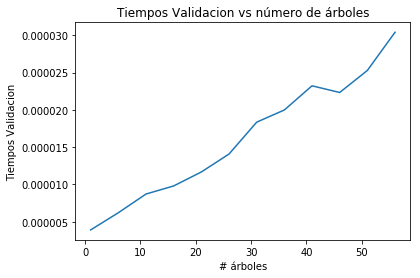

In [17]:
import time
import matplotlib.pyplot as plt

ejex = list(range(1,60,5))
timesTrain = []
timesVal = []
for i in ejex:
    #ti = time.process_time()
    efi,inte,timeTrain, timeVal = randomTree(narboles=i, caracteristicas=20)
    #tf = time.process_time()
    
    timesTrain.append(timeTrain)
    timesVal.append(timeVal)
    
plt.plot(ejex, timesTrain)
plt.title('Tiempos Entrenamieto vs número de árboles')
plt.xlabel('# árboles')
plt.ylabel("Tiempo Entrenamieto")
plt.show()
plt.plot(ejex, timesVal)
plt.title('Tiempos Validacion vs número de árboles')
plt.xlabel('# árboles')
plt.ylabel("Tiempos Validacion")
plt.show()

/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: Dep

/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: Dep

/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/home/jdavid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: Dep

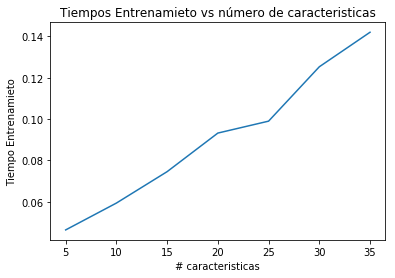

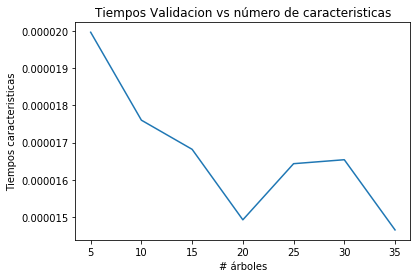

In [20]:
ejex = list(range(5,np.shape(X)[1],5))
timesTrain = []
timesVal = []
for i in ejex:
    #ti = time.process_time()
    efi,inte,timeTrain, timeVal = randomTree(narboles=30, caracteristicas=i)
    #tf = time.process_time()
    
    timesTrain.append(timeTrain)
    timesVal.append(timeVal)
    
plt.plot(ejex, timesTrain)
plt.title('Tiempos Entrenamieto vs número de caracteristicas')
plt.xlabel('# caracteristicas')
plt.ylabel("Tiempo Entrenamieto")
plt.show()
plt.plot(ejex, timesVal)
plt.title('Tiempos Validacion vs número de caracteristicas')
plt.xlabel('# árboles')
plt.ylabel("Tiempos caracteristicas")
plt.show()